# Графы
### Борунов Семён Сергеевич НММбд-01-22

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
import pandas as pd

### Задача 1

В датасете “Песнь льда и пламени” (см раздел файлы-учебыне материалы) проверьте наличие компонент связности.

In [2]:
df = pd.read_csv('GameOfThrones.csv')
df.head()

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1


In [3]:
df = df.drop(['Type', 'weight', 'book'], axis=1)
df.head()

,Source,Target
0,Addam-Marbrand,Jaime-Lannister
1,Addam-Marbrand,Tywin-Lannister
2,Aegon-I-Targaryen,Daenerys-Targaryen
3,Aegon-I-Targaryen,Eddard-Stark
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne


In [4]:
G = nx.from_pandas_edgelist(df, source='Source', target='Target')

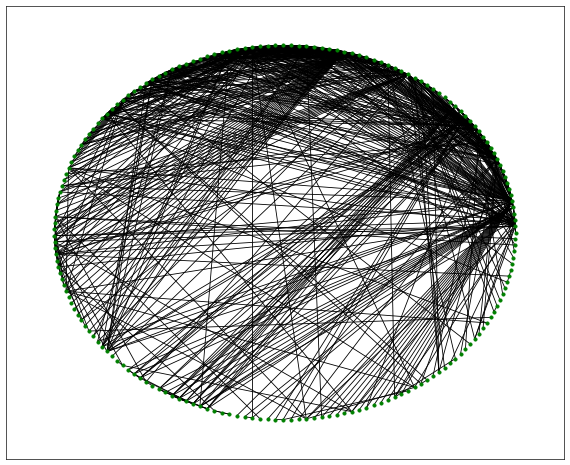

In [5]:
fig = plt.figure(1, figsize=(12, 10), dpi=60)
pos = nx.circular_layout(G)

nx.draw_networkx(G,
        pos,
        with_labels=False, 
        node_color='g',   
        node_size=15)    
plt.show()

В таком виде даже можно поверить, что получится не связный граф

In [6]:
comps = nx.connected_components(G)
print(nx.number_connected_components(G))
print(*comps, end='\n')

1
{'Hullen', 'Chett', 'Stevron-Frey', 'Rhaegar-Targaryen', 'Robb-Stark', 'Heward', 'Alyn', 'Sandor-Clegane', 'Halder', 'Tommen-Baratheon', 'Nan', 'Shagga', 'Chiggen', 'Marillion', 'Mychel-Redfort', 'Nestor-Royce', 'Timett', 'Petyr-Baelish', 'Rast', 'Loras-Tyrell', 'Edmure-Tully', 'Albett', 'Varys', 'Tywin-Lannister', 'High-Septon-(fat_one)', 'Addam-Marbrand', 'Danwell-Frey', 'Haggo', 'Bronn', 'Maegor-I-Targaryen', 'Dywen', 'Hosteen-Frey', 'Grenn', 'Gunthor-son-of-Gurn', 'Janos-Slynt', 'Tomard', 'Hoster-Tully', 'Porther', 'Tobho-Mott', 'Joseth', 'Roose-Bolton', 'Daryn-Hornwood', 'Jon-Umber-(Greatjon)', 'Wendel-Manderly', 'Myrcella-Baratheon', 'Viserys-Targaryen', 'Joss', 'Sansa-Stark', 'Chella', 'Kevan-Lannister', 'Hodor', 'Mace-Tyrell', 'Harwin', 'Mance-Rayder', 'Colemon', 'Benjen-Stark', 'Mord', 'Paxter-Redwyne', 'Jaime-Lannister', 'Jeyne-Poole', 'Karyl-Vance', 'Jhogo', 'Jorah-Mormont', 'Eddard-Stark', 'Bran-Stark', 'Jaremy-Rykker', 'Marq-Piper', 'Othor', 'Mordane', 'Tytos-Blackwood',

Но он все равно получился связным

### Задача 2

Используя библиотеку OSMnx проложите кратчайший по **расстоянию** маршрут от Вашего дома до работы (или учебного заведения) и выведите его на экран. Тип сети network_type используйте “drive”, т.е. для автомобилей.


In [7]:
place = "Moscow, Russia"
G = ox.graph_from_place(place, network_type="drive")

In [8]:
home_lat, home_long = 55.550763, 37.556052
uni_lat, uni_long = 55.710702, 37.603747

home_node = ox.distance.nearest_nodes(G, home_long, home_lat)
uni_node = ox.distance.nearest_nodes(G, uni_long, uni_lat)

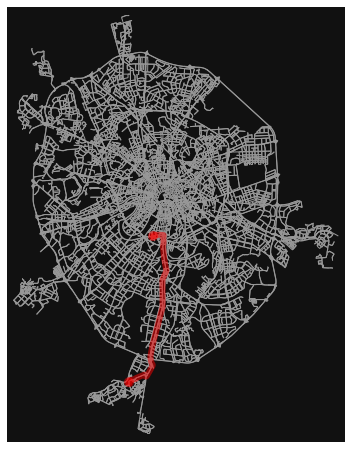

In [9]:
route_nodes = ox.routing.shortest_path(G, home_node, uni_node, weight="length")

fig, ax = ox.plot_graph_route(G, route_nodes, route_color="r", 
                              route_linewidth=6, node_size=0)

### Задача 3

Используя библиотеку OSMnx проложите кратчайший по **времени** маршрут от Вашего дома до работы (или учебного заведения) и выведите его на экран. Тип сети network_type используйте “drive”, т.е. для автомобилей.

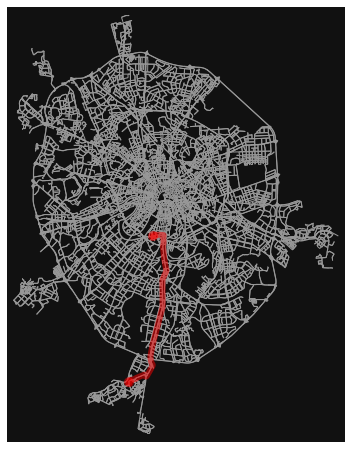

In [10]:
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)

route_nodes = ox.routing.shortest_path(G, home_node, uni_node, weight="travel_time")

fig, ax = ox.plot_graph_route(G, route_nodes, route_color="r", 
                              route_linewidth=6, node_size=0)

И это вполне согласуется с другими картами:
<img src='время.jpg' />

### Задача 4

Используя библиотеку OSMnx проложите кратчайший по расстоянию маршрут от Вашего дома до работы (или учебного заведения) и выведите его на экран. Тип сети network_type используйте “walk”, т.е. для пешеходов.


In [11]:
ox.settings.log_console=True

In [12]:
G = ox.graph_from_place(place, network_type="walk", retain_all=False, which_result=2)

In [13]:
home_node = ox.distance.nearest_nodes(G, home_long, home_lat)
uni_node = ox.distance.nearest_nodes(G, uni_long, uni_lat)

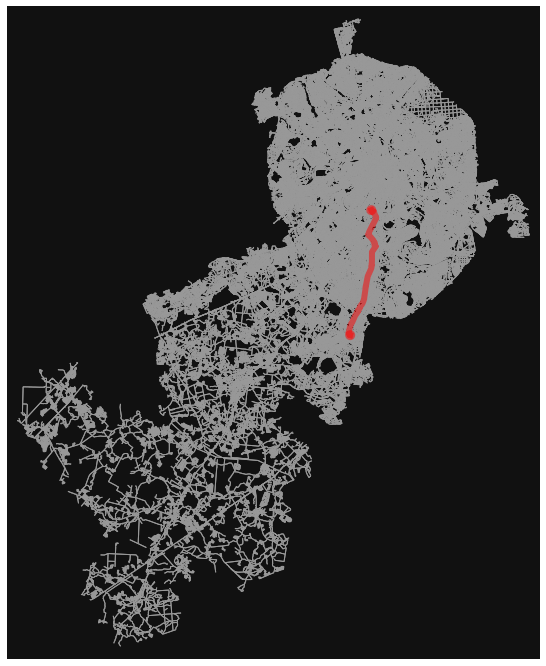

In [17]:
route_nodes = ox.routing.shortest_path(G, home_node, uni_node, weight="length")

fig, ax = ox.plot_graph_route(G, route_nodes, route_color="r", 
                              route_linewidth=6, node_size=0, figsize=(15, 12))

### Задача 5

Используя библиотеку OSMnx проложите кратчайший по времени маршрут от Вашего дома до работы (или учебного заведения) и выведите его на экран. Тип сети network_type используйте “walk”, т.е. для пешеходов.

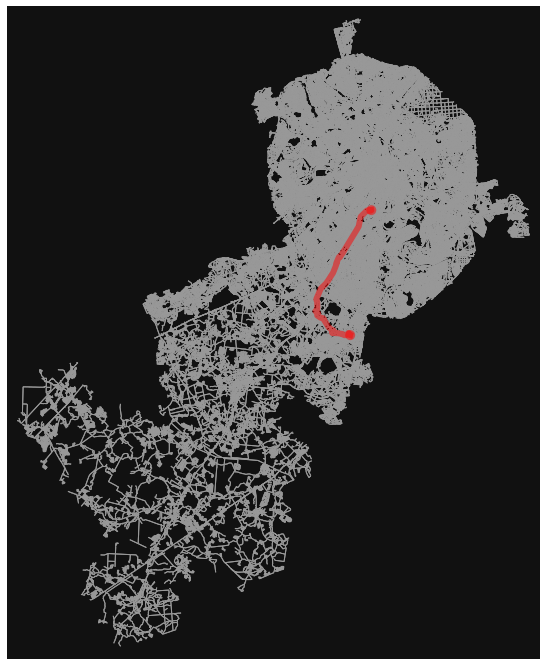

In [18]:
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)

route_nodes = ox.routing.shortest_path(G, home_node, uni_node, weight="travel_time")

fig, ax = ox.plot_graph_route(G, route_nodes, route_color="r", 
                              route_linewidth=6, node_size=0, figsize=(15, 12))